In [ ]:
pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host=files.pythonhosted.org tensorflow pandas numpy matplotlib opencv-python

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Load and Preprocess the data
batch_size = 32
img_height = 48
img_width = 48

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    image_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = 'grayscale'
)

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))
test_ds = test_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))
val_ds = val_ds.map(lambda X, y: (normalization_layer(X), tf.one_hot(y, depth = 7)))

Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


In [5]:
# Build the Model
model = Sequential([
    Conv2D(32,(3,3),activation = 'tanh',
    input_shape = (img_height, img_width,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'tanh'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation = 'tanh'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'tanh'),
    Dropout(0.5),
    Dense(7,activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Train the Model
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 756s 838ms/step - accuracy: 0.3287 - loss: 1.6878 - val_accuracy: 0.4712 - val_loss: 1.3803
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - accuracy: 0.4806 - loss: 1.3796 - val_accuracy: 0.4935 - val_loss: 1.3246
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.5228 - loss: 1.2769 - val_accuracy: 0.5107 - val_loss: 1.2991
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.5611 - loss: 1.1803 - val_accuracy: 0.5280 - val_loss: 1.2949
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.5976 - loss: 1.0836 - val_accuracy: 0.5294 - val_loss: 1.3018
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.6354 - loss: 0.9841 - val_accuracy: 0.5391 - val_loss: 1.3332
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.6734 - loss: 0.8933 - val_accuracy: 0.5227 - val_loss: 1.4395
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.7072 - loss: 0.806

In [7]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test Loss:{test_loss}')
print(f'Test Accuracy:{test_acc}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 340ms/step - accuracy: 0.5100 - loss: 3.0614
Test Loss:3.0728094577789307
Test Accuracy:0.5110058784484863


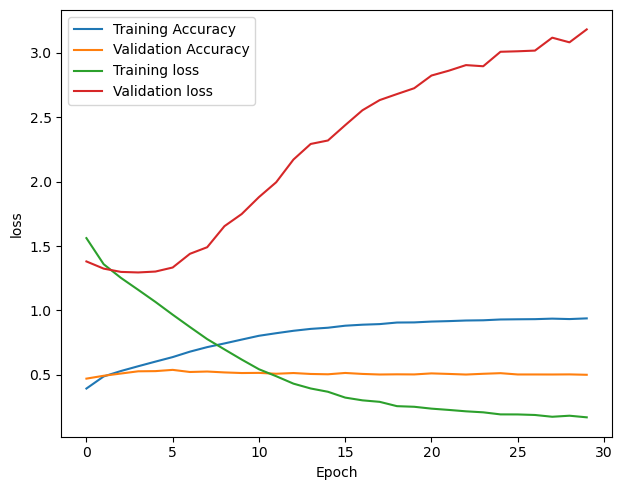

In [8]:
#Visualize Training History
plt.figure(figsize=(12,5))
#plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


#plot loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
#Predictions (Inference)
def predict_emotion(image_path):
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(48,48))
    img = img.reshape(1,48,48,1)/255.0
    prediction = model.predict(img)
    emotion_label = ['Angry','Disgust','Fear','Happy','Sad','Neutral','Surprise']
    predict_emotion = emotion_label[np.argmax(prediction)]
    return predict_emotion

In [10]:
#Example
image_path = '0.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '1.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '2.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '3.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '4.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '5.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

image_path = '6.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Emotion: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Emotion: Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Emotion: Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Emotion: Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Emotion: Fear
